#`Loading The Dataset`



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import torchvision.datasets
import torchvision.transforms as transform
import torchvision.models as models

In [ ]:
!unzip /data-1557554654170.zip

Archive:  /data-1557554654170.zip
replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/imagenet/.DS_Store  
  inflating: __MACOSX/data/imagenet/._.DS_Store  
  inflating: data/imagenet/1/stethoscope823-1.JPEG  
  inflating: __MACOSX/data/imagenet/1/._stethoscope823-1.JPEG  
  inflating: data/imagenet/1/harmonica593-1.JPEG  
  inflating: __MACOSX/data/imagenet/1/._harmonica593-1.JPEG  
  inflating: data/imagenet/1/dome538-1.JPEG  
  inflating: __MACOSX/data/imagenet/1/._dome538-1.JPEG  
  inflating: data/imagenet/1/harmonica593-3.JPEG  
  inflating: __MACOSX/data/imagenet/1/._harmonica593-3.JPEG  
  inflating: data/imagenet/1/dome538-2.JPEG  
  inflating: __MACOSX/data/imagenet/1/._dome538-2.JPEG  
  inflating: data/imagenet/1/harmonica593-2.JPEG  
  inflating: __MACOSX/data/imagenet/1/._harmonica593-2.JPEG  
  inflating: data/imagenet/1/stethoscope823-2.JPEG  
  inflating: __MACO

In [ ]:
with open('/content/data/imagenet_labels.txt') as f:
  classes=eval(f.read())
  

In [ ]:
print(classes)

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

In [ ]:
transform=transform.Compose([
                              transform.Resize(224),
                              transform.ToTensor(),
                              transform.Normalize((.485,.456,.406),(.229,.224,.225))
])

In [ ]:
evalset=torchvision.datasets.ImageFolder(root='./data/imagenet',transform=transform)

In [ ]:
batch_size=1

In [ ]:
import torch
evalloader=torch.utils.data.DataLoader(evalset,batch_size=batch_size,shuffle=True)

In [ ]:
dataiter=iter(evalloader)

In [ ]:
data,labels=dataiter.next()

In [ ]:
data[0].shape

torch.Size([3, 224, 224])

In [ ]:
def imshow(images):
  std_correction=np.asarray([.229,.224,.225]).reshape(3,1,1)
  mean_correction=np.asarray([.485,.456,.406]).reshape(3,1,1)
 
  img=images[0].numpy()
  img=np.multiply(img,std_correction)+mean_correction
  img=np.transpose(img,(1,2,0))
  plt.axis('off')
  plt.imshow(img)

In [ ]:
 def prob(dataloader):
   images,label=next(iter(dataloader))
   imshow(images)
   output=vgg(images)
   _ , pred=torch.max(output.data,1)
   return images,pred
   


#`Model`

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


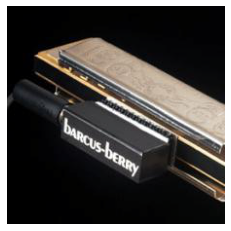

In [ ]:
images,pred=prob(evalloader)

In [ ]:
vgg=models.vgg16(pretrained=True)
vgg.eval()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

#`Occlusion Analysis`

In [ ]:
import torch.nn as nn

In [ ]:
outputs = vgg(images)
print(outputs.shape)
outputs = nn.functional.softmax(outputs, dim=1)
prob_no_occ, pred = torch.max(outputs.data, 1)
prob_no_occ = prob_no_occ[0].item()
print(prob_no_occ)

torch.Size([1, 1000])
0.9984715580940247


In [ ]:
def occlusion_analysis(model,image,label,occ_size=50,occ_stride=50,occ_pixel=.5):
  width,height=image.shape[-2],image.shape[-1]

  output_height=int(np.ceil((height-occ_size)/occ_stride))

  output_width=int(np.ceil((width-occ_size)/occ_stride))

  occlusion_image=torch.zeros((output_width,output_height))

  for h in range(0,output_height):
    for w in range(0,output_height):
      h_start=h*occ_stride
      w_start=w*occ_stride

      h_end=min(height,h_start+occ_stride)
      w_end=min(width,w_start+occ_stride)
      if (w_end) >= width or (h_end) >= height:
                continue

      input_image=image.clone().detach()
      input_image[:,:,w_start:w_end,h_start:h_end]=occ_pixel

      outputs = model(input_image)
      #print(outputs.shape)
      outputs = nn.functional.softmax(outputs, dim=1)
      prob_occ, pred = torch.max(outputs.data, 1)
      print(prob_occ.item())
      
      occlusion_image[w,h] =prob_occ.item()
  return occlusion_image


In [ ]:
heatmap=occlusion_analysis(vgg,images,pred[0].item,32,14,.5)

0.9981715679168701
0.9982821941375732
0.9981524348258972
0.9983099699020386
0.9981123208999634
0.9980727434158325
0.9982591271400452
0.9984472393989563
0.9984112977981567
0.9983639121055603
0.9983946681022644
0.998023271560669
0.9980356097221375
0.9980375170707703
0.9981206059455872
0.9981604218482971
0.9982898831367493
0.9986989498138428
0.9985034465789795
0.9981414079666138
0.9982629418373108
0.9987610578536987
0.9986060261726379
0.9985207915306091
0.9984595775604248
0.9982153177261353
0.9983086585998535
0.998245358467102
0.9980335831642151
0.9979925155639648
0.998140811920166
0.9984070658683777
0.9978893399238586
0.9974122643470764
0.9979077577590942
0.9989504814147949
0.9989818930625916
0.998310923576355
0.9982621073722839
0.9976531863212585
0.9978795051574707
0.9978052973747253
0.9979243278503418
0.9977566599845886
0.9987136125564575
0.9984143972396851
0.9979203343391418
0.9973056316375732
0.9977917671203613
0.9987109899520874
0.9990803003311157
0.9979693293571472
0.99828714132308

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


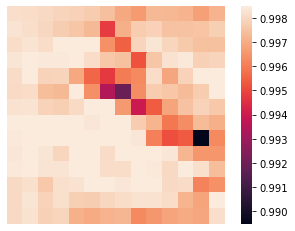

In [ ]:
imgplot = sns.heatmap(heatmap, xticklabels=False, yticklabels=False, vmax=prob_no_occ)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


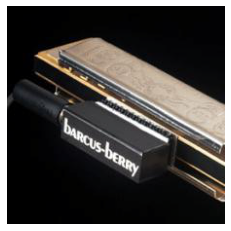

In [ ]:
imshow(images)